# Finding Business Insight from Employee Resignations EDA

### Aim: 

To understand the concepts of business intelligence insights, by analysing the employee resignation behaviour.

Perform Data cleaning and EDA through python and identifying the KBRs and KPIs for this specific business problem.

#### Business Problem: 

The key to success in any organization is attracting and retaining top talent. As an HR analyst one of the key task is to determine which factors keep employees at the company and which prompt others to leave. Given in the data is a set of data points on the employees who are either currently working within the company or have resigned. The objective is to identify and improve these factors to prevent loss of good people.

Our goal is to provide a complete analysis about all the factors that has impact on employee’s resignation patterns, the current insights of the organisation and its employee demographics.

In [2]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics

In [3]:
#load the data
df = pd.read_csv('employee_attrition.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0


In [6]:
#get the number of rows and columns 
df.shape

(1029, 35)

In [7]:
#get the column data types and there info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [8]:
df.isna().sum()

Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

# Data Cleaning

### Cleaning Age feature
If we check above we have a age column contaning the highest number of null values which is 136, We will first try to clean it.For cleaning the age column we will use the 2 estimate one is gender and another is maritalstatus.

In [9]:
check_single_index= df[(df['Age'].isna()) & (df['MaritalStatus']=='Single')].index

In [10]:
df['MaritalStatus'].value_counts()

Married     474
Single      320
Divorced    230
Name: MaritalStatus, dtype: int64

In [11]:
marrried_men = df[(df['Gender']=='Male') & (df['MaritalStatus']=='Married')]
single_men = df[(df['Gender']=='Male') & (df['MaritalStatus']=='Single')]
divorced_men = df[(df['Gender']=='Male') & (df['MaritalStatus']=='Divorced')]

In [12]:
marrried_men['Age']

3       50.0
5       33.0
7       22.0
12      40.0
13      55.0
        ... 
1023    33.0
1024     NaN
1026    22.0
1027    29.0
1028    50.0
Name: Age, Length: 278, dtype: float64

In [13]:
print(marrried_men['Age'].mean())
print(single_men['Age'].mean())
print(divorced_men['Age'].mean())
print(marrried_men['Age'].mode())
print(single_men['Age'].mode())
print(divorced_men['Age'].mode())

38.7038626609442
36.83116883116883
38.082089552238806
0    31.0
dtype: float64
0    36.0
dtype: float64
0    30.0
1    33.0
dtype: float64


<AxesSubplot:xlabel='MaritalStatus', ylabel='Age'>

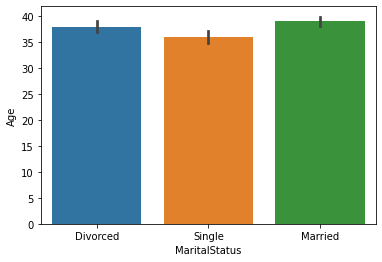

In [14]:
sns.barplot(x=df['MaritalStatus'],y=df['Age'])

In [15]:
#lets find out the male and female marriage mean

male_marriage_mean=df[(df['Gender']=='Male') & (df['MaritalStatus']=='Married')]
male_marriage_mean= round(male_marriage_mean['Age'].mean())
male_marriage_mean

male_single_mean=df[(df['Gender']=='Male') & (df['MaritalStatus']=='Single')]
male_single_mean= round(male_single_mean['Age'].mean())
male_single_mean

male_divorced_mean=df[(df['Gender']=='Male') & (df['MaritalStatus']=='Divorced')]
male_divorced_mean= round(male_divorced_mean['Age'].mean())
male_divorced_mean


female_marriage_mean=df[(df['Gender']=='Female') & (df['MaritalStatus']=='Married')]
female_marriage_mean= round(female_marriage_mean['Age'].mean())
female_marriage_mean

female_single_mean=df[(df['Gender']=='Female') & (df['MaritalStatus']=='Single')]
female_single_mean= round(female_single_mean['Age'].mean())
female_single_mean

female_divorced_mean=df[(df['Gender']=='Female') & (df['MaritalStatus']=='Divorced')]
female_divorced_mean= round(female_divorced_mean['Age'].mean())
female_divorced_mean

print(male_marriage_mean, male_single_mean,male_divorced_mean,female_marriage_mean,female_single_mean,female_divorced_mean)

39 37 38 40 35 38


In [16]:
for i in range(len(df['Age'])):
    if math.isnan(df['Age'][i]):
        if (df.loc[i,'MaritalStatus']=='Married') & (df.loc[i,'Gender']=='Male'):
            df['Age'][i]=male_marriage_mean
        elif (df.loc[i,'MaritalStatus']=='Single') & (df.loc[i,'Gender']=='Male'):
            df['Age'][i]=male_single_mean
        elif (df.loc[i,'MaritalStatus']=='Divorced') & (df.loc[i,'Gender']=='Male'):
            df['Age'][i]=male_divorced_mean
        elif (df.loc[i,'MaritalStatus']=='Married') & (df.loc[i,'Gender']=='Female'):
            df['Age'][i]=female_marriage_mean
        elif (df.loc[i,'MaritalStatus']=='Single') & (df.loc[i,'Gender']=='Female'):
            df['Age'][i]=female_single_mean
        else:
            df['Age'][i]=female_divorced_mean


<ipython-input-16-30ce9ed386ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i]=male_single_mean
<ipython-input-16-30ce9ed386ba>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i]=female_single_mean
<ipython-input-16-30ce9ed386ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i]=male_marriage_mean
<ipython-input-16-30ce9ed386ba>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [17]:
df.Age.isna().sum()

0

In [18]:
df.loc[check_single_index]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
8,37.0,Yes,Travel_Rarely,890.0,Research & Development,2.0,4,Medical,1,828,3,Male,46,3,1,Research Scientist,3,Single,4382,16374,6,Y,No,17,3,4,80,0,5,3,2,2,2,2,1
23,35.0,No,Travel_Rarely,1146.0,Human Resources,26.0,4,Life Sciences,1,2040,3,Female,31,3,3,Human Resources,4,Single,8837,16642,1,Y,Yes,16,3,3,80,0,9,2,3,9,0,1,7
29,37.0,Yes,Travel_Frequently,289.0,Research & Development,2.0,2,Medical,1,1504,3,Male,38,2,1,Laboratory Technician,1,Single,2561,5355,7,Y,No,11,3,3,80,0,8,2,2,0,0,0,0
36,35.0,No,Travel_Rarely,1343.0,Research & Development,27.0,1,Medical,1,856,3,Female,53,2,1,Research Scientist,1,Single,2559,17852,1,Y,No,11,3,4,80,0,6,3,2,6,5,1,1
51,35.0,No,Travel_Rarely,195.0,Sales,1.0,3,Medical,1,620,1,Female,80,3,2,Sales Executive,3,Single,4859,6698,1,Y,No,16,3,4,80,0,5,3,3,5,4,0,3
81,37.0,No,Travel_Rarely,1395.0,Research & Development,9.0,4,Medical,1,2008,2,Male,48,3,2,Research Scientist,3,Single,5098,18698,1,Y,No,19,3,2,80,0,10,5,3,10,7,0,8
129,37.0,No,Travel_Rarely,640.0,Research & Development,1.0,3,Technical Degree,1,1301,4,Male,84,3,1,Research Scientist,1,Single,2080,4732,2,Y,No,11,3,2,80,0,5,2,2,3,2,1,2
130,37.0,No,Travel_Rarely,683.0,Research & Development,2.0,1,Medical,1,1407,1,Male,36,2,1,Research Scientist,4,Single,3904,4050,0,Y,No,12,3,4,80,0,5,2,3,4,3,1,1
228,37.0,Yes,Non-Travel,1366.0,Research & Development,24.0,2,Technical Degree,1,1082,2,Male,72,2,3,Healthcare Representative,1,Single,8722,12355,1,Y,No,12,3,1,80,0,10,2,2,10,7,1,9
246,37.0,Yes,Travel_Rarely,1357.0,Research & Development,25.0,3,Life Sciences,1,55,1,Male,48,1,1,Laboratory Technician,3,Single,2293,10558,1,Y,No,12,3,3,80,0,1,2,2,1,0,0,1


In [19]:
df.loc[df.DailyRate.isna()].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
37,39.0,No,Travel_Rarely,NaN,Sales,1.0,3,Marketing,1,600,2,Male,85,3,2,Sales Executive,3,Married,4717,18659,9,Y,No,11,3,3,80,0,15,2,3,11,9,6,9
63,46.0,No,Travel_Rarely,NaN,Sales,1.0,2,Marketing,1,244,2,Female,92,3,3,Sales Executive,1,Divorced,10453,2137,1,Y,No,25,4,3,80,3,24,2,3,24,13,15,7
73,43.0,No,Travel_Rarely,NaN,Research & Development,6.0,3,Medical,1,1866,1,Female,81,2,5,Manager,3,Married,19392,22539,7,Y,No,13,3,4,80,0,21,2,3,16,12,6,14
84,34.0,No,Travel_Rarely,NaN,Sales,13.0,4,Medical,1,1951,4,Male,39,3,3,Sales Executive,3,Divorced,8628,22914,1,Y,No,18,3,3,80,1,9,2,2,8,7,1,1
102,37.0,No,Travel_Rarely,NaN,Human Resources,8.0,2,Other,1,1794,3,Male,89,3,2,Human Resources,2,Divorced,4071,12832,2,Y,No,13,3,3,80,0,19,4,2,10,0,4,7


In [20]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0


In [21]:
# Dealing with Daily Rate Column we know the daily rate can be calculated as per per hours rate * number of hours work in a day 
for i in range(len(df['DailyRate'])):
    if math.isnan(df['DailyRate'][i]):
        df['DailyRate'][i]= df['HourlyRate'][i]* 8 
                      

<ipython-input-21-aca3460dd37a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DailyRate'][i]= df['HourlyRate'][i]* 8


In [22]:
df.isna().sum()

Age                          0
Attrition                    0
BusinessTravel               5
DailyRate                    0
Department                   0
DistanceFromHome            95
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                5
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

In [23]:
df['BusinessTravel'].value_counts()

Travel_Rarely        723
Travel_Frequently    199
Non-Travel           102
Name: BusinessTravel, dtype: int64

In [24]:
df['DistanceFromHome'].fillna(df['DistanceFromHome'].mean(),inplace=True)

In [25]:
df['DistanceFromHome'].mean()

9.930406852248414

In [26]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              5
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               5
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [27]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.000000,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.000000,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.000000,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,9.930407,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.000000,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0


<AxesSubplot:xlabel='JobLevel', ylabel='count'>

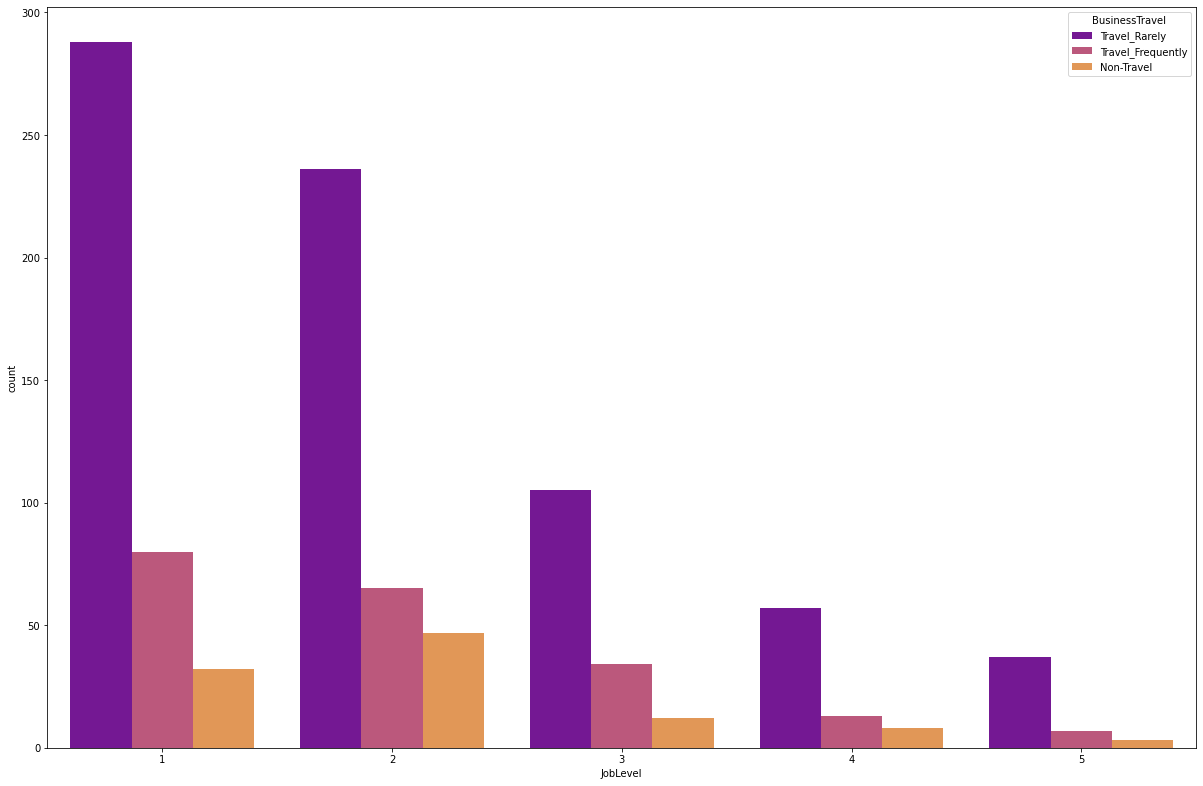

In [28]:
plt.figure(figsize=(70,30))
plt.subplot(2,3,1)
sns.countplot(x='JobLevel', hue='BusinessTravel', data=df, palette='plasma')

In [29]:
#total we have 10 null values so better drop them 
df.dropna(inplace=True)

In [30]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# EDA 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

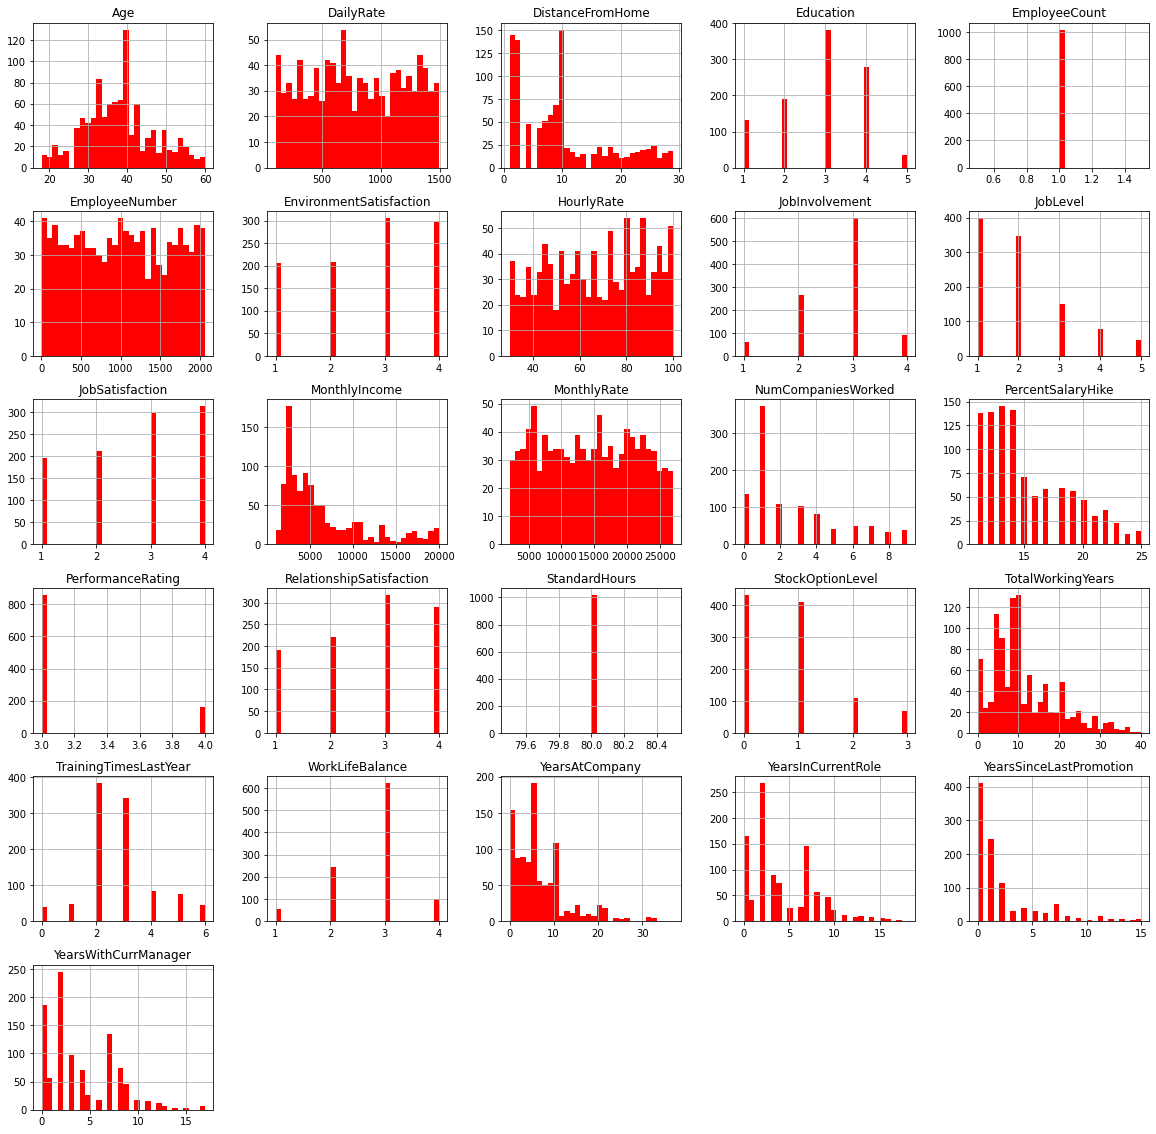

In [31]:
df.hist(bins = 30, figsize = (20,20), color = 'r')

- It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
- Let's drop 'EmployeeNumber' as well

In [32]:
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [33]:
# Let's see how many employees left the company! 
left_df  = df[df['Attrition'] == 'Yes']
stayed_df = df[df['Attrition'] == 'No']

###  Let us  catrgories the columns based on numerical and categorical

In [34]:
numeric_data = df.select_dtypes(include=[np.number]).columns
categorical_data = df.select_dtypes(exclude=[np.number]).columns

categorical_data

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

<ipython-input-35-3861fb62db7a>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,10))


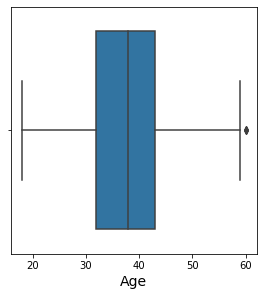

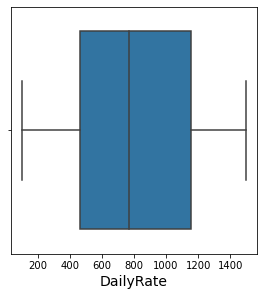

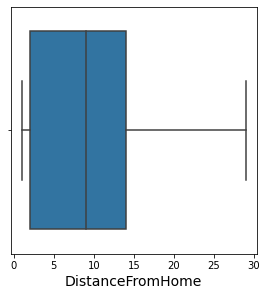

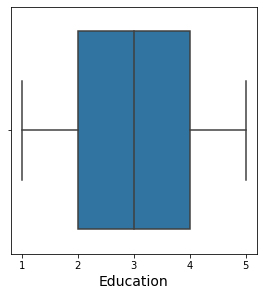

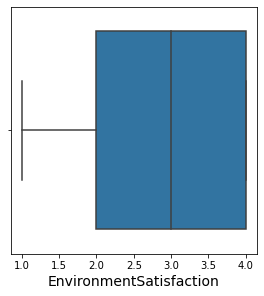

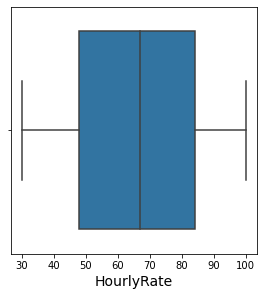

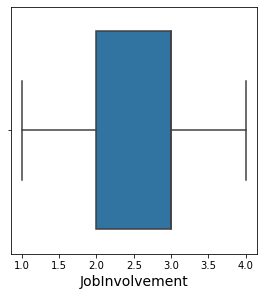

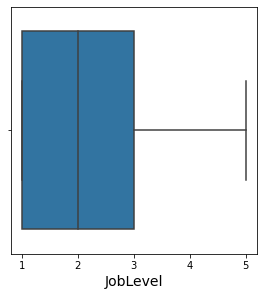

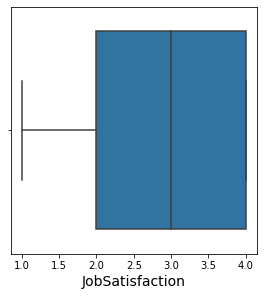

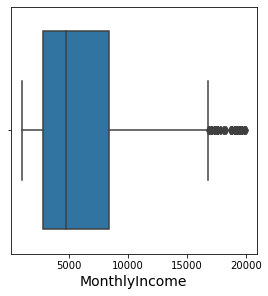

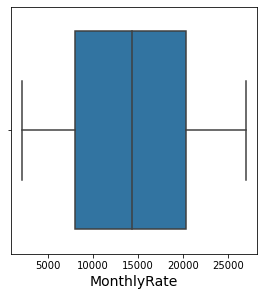

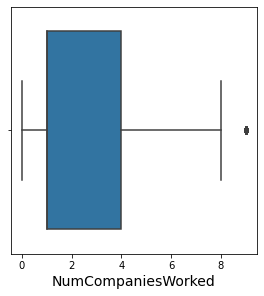

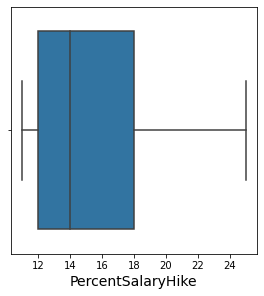

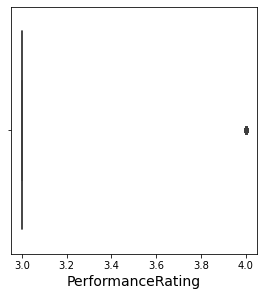

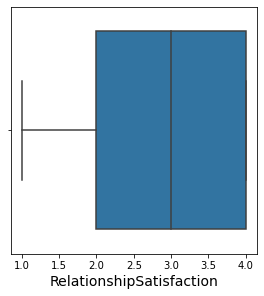

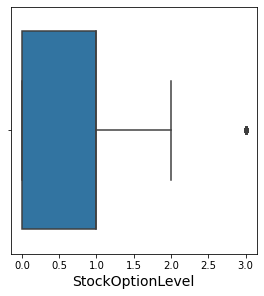

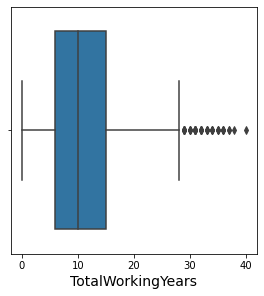

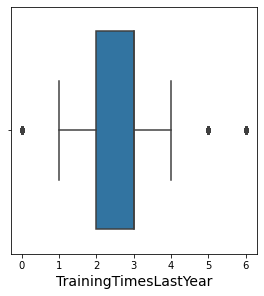

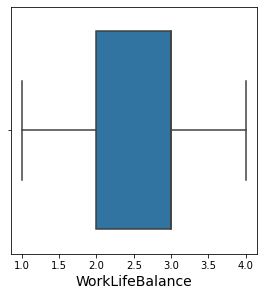

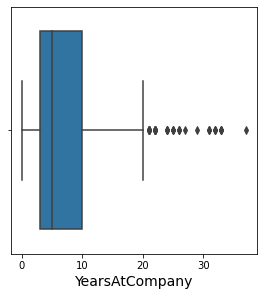

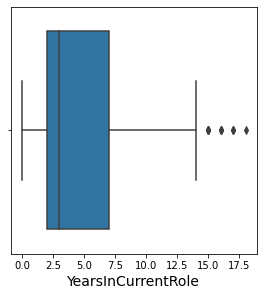

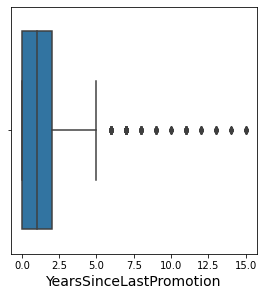

In [35]:
# let us find the outrliers in our dataset 
for i in numeric_data[:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.boxplot(x=df[i])
    plt.xlabel(i, fontsize=14)

In [36]:
# Checking for outliers in the continuous variables
num_churn = df[numeric_data]

In [37]:
num_churn.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.00000,1019.000000,1019.000000
mean,37.957802,795.789990,9.948438,2.897939,2.683023,66.716389,2.715407,2.043180,2.715407,6448.287537,14266.670265,2.650638,15.253189,3.157998,2.694799,0.818449,11.211973,2.779195,2.750736,6.938175,4.21001,2.127576,3.999019
std,8.763157,404.918351,8.020587,1.053288,1.098586,20.439547,0.708819,1.117858,1.096282,4789.583086,7070.342899,2.506892,3.655966,0.364918,1.074843,0.877246,7.876516,1.279013,0.698502,6.069110,3.64040,3.118708,3.516031
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,32.000000,463.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2812.500000,7987.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,38.000000,770.000000,9.000000,3.000000,3.000000,67.000000,3.000000,2.000000,3.000000,4739.000000,14363.000000,1.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,1153.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8421.000000,20379.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,10.000000,7.00000,2.000000,7.000000
90%,51.000000,1356.200000,24.000000,4.000000,4.000000,94.000000,3.000000,4.000000,4.000000,14044.400000,23967.600000,7.000000,21.000000,4.000000,4.000000,2.000000,23.000000,5.000000,3.000000,15.000000,9.00000,7.000000,9.000000
95%,54.000000,1421.100000,26.000000,4.000000,4.000000,97.100000,4.000000,4.000000,4.000000,17590.600000,25356.500000,8.000000,22.000000,4.000000,4.000000,3.000000,28.000000,5.000000,4.000000,20.000000,11.00000,9.000000,10.000000
99%,58.000000,1480.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19654.040000,26756.200000,9.000000,25.000000,4.000000,4.000000,3.000000,34.820000,6.000000,4.000000,30.640000,15.00000,13.000000,14.000000


From the distribution shown above, we can see that there no outliers in our data. The numbers are gradually increasing.

Montly income is having highest number of outliers

### checking our categorical data with respect to Attrition

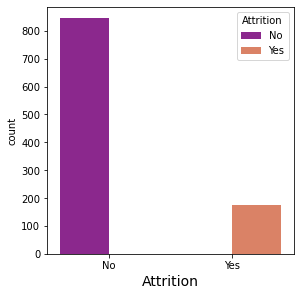

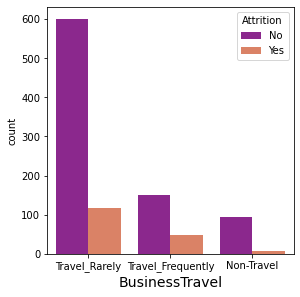

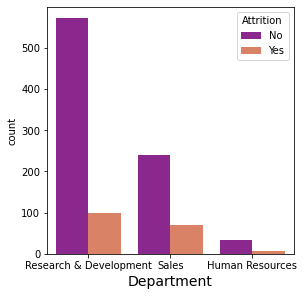

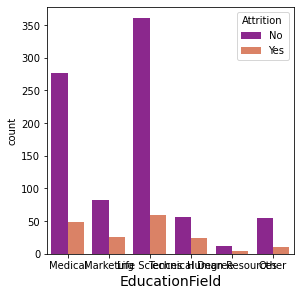

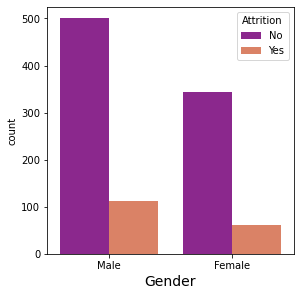

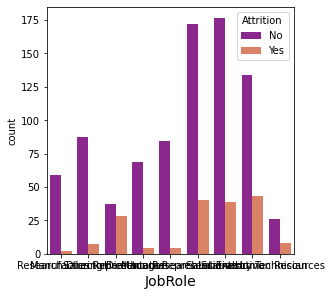

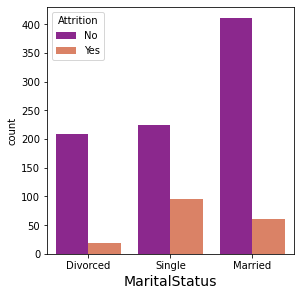

In [38]:
for i in categorical_data[:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i, hue='Attrition', data=df, palette='plasma')
    plt.xlabel(i, fontsize=14)

# Lets us jump directly into some insights from data

In [39]:
#let'see how many people left the company
total_number_of_employee= len(df)
Number_of_employee_left = (df['Attrition']=='Yes').sum()
Percentage_of_employee_left = Number_of_employee_left/total_number_of_employee*100


In [40]:
print('Total Number of Employee =',Number_of_employee_left)
print('Number of Employee left company =',Number_of_employee_left)
print('Percentage of employee left =',Percentage_of_employee_left,"%")

Total Number of Employee = 175
Number of Employee left company = 175
Percentage of employee left = 17.17369970559372 %


In [41]:
total_number_of_employee

1019

In [42]:
Percentage_of_employee_left

17.17369970559372

In [43]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.000000,2,Medical,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,No,22,4,3,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.000000,2,Medical,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,No,20,4,4,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.000000,1,Marketing,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,No,13,3,2,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,9.930407,3,Medical,1,Male,99,3,5,Manager,2,Married,18200,7999,1,No,11,3,3,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.000000,4,Life Sciences,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,No,19,3,4,0,18,4,3,8,6,4,0


## Let us calculate the employee Retention rate 
Engaged and satisfied employees generally want to stick around. In addition to the high costs of replacing people who leave and training new hires, a high turnover rate is a sign of a poor employee experience.
- To calculate your employee retention rate, we are using this formula
- (Employees at end of period / employees at start of period) * 100
- For example, an employer that started the quarter with 100 employees and ended with 95 of would have a retention rate of 95%. A higher retention rate is better.

In [44]:
retentionrate = (total_number_of_employee-Number_of_employee_left)/total_number_of_employee*100
retentionrate

82.82630029440628

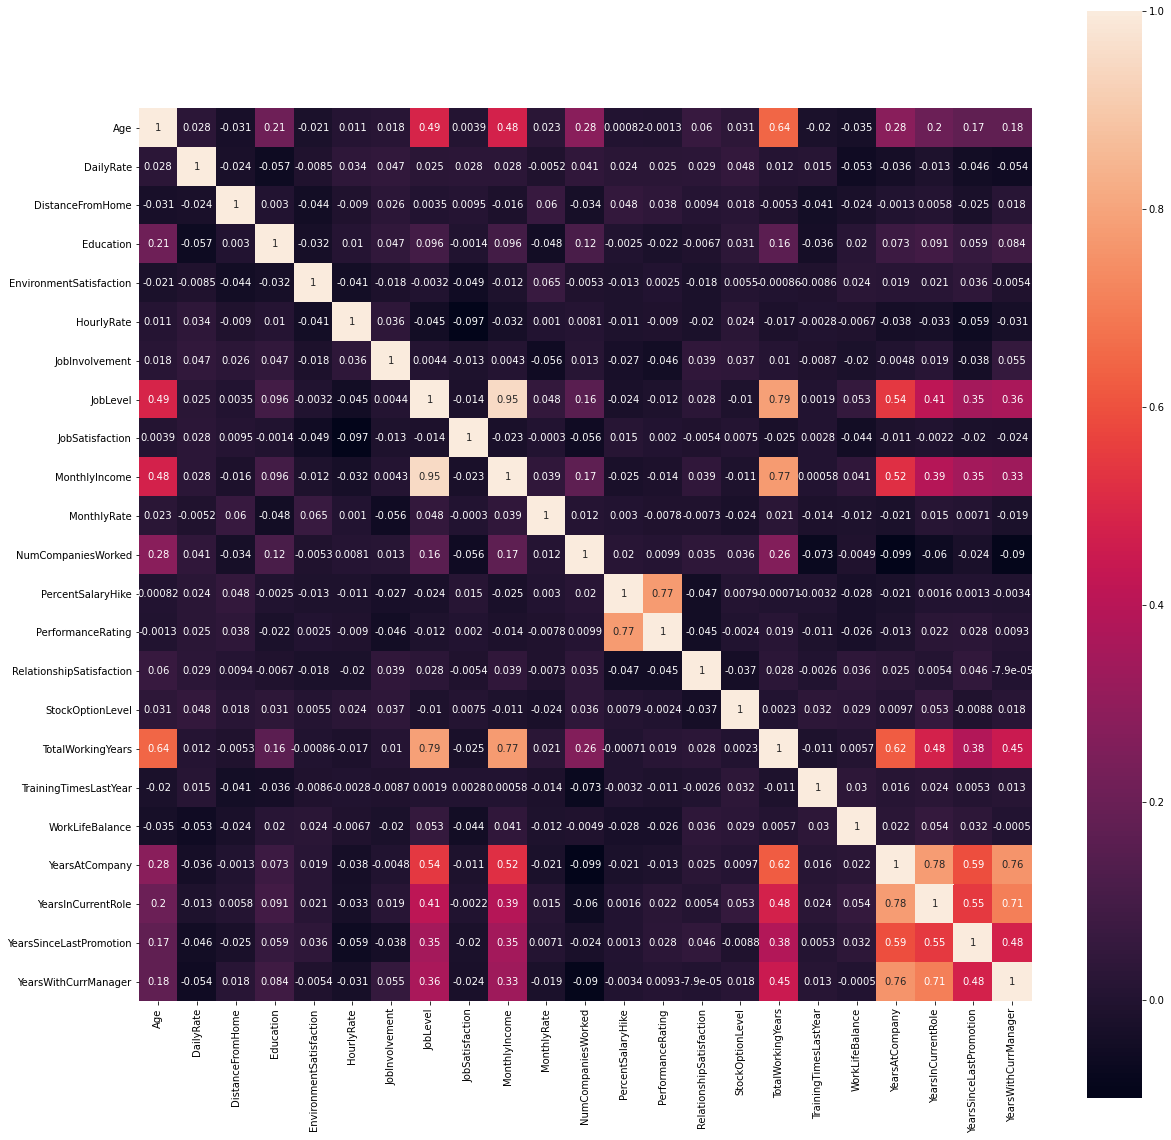

In [45]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrmat, square=True, annot=True);

- Monthly income is strongly correlated with total working years
- Monthly income is strongly correlated with Years atCompany
- Age is stongly correlated with monthly income

<AxesSubplot:xlabel='Age', ylabel='count'>

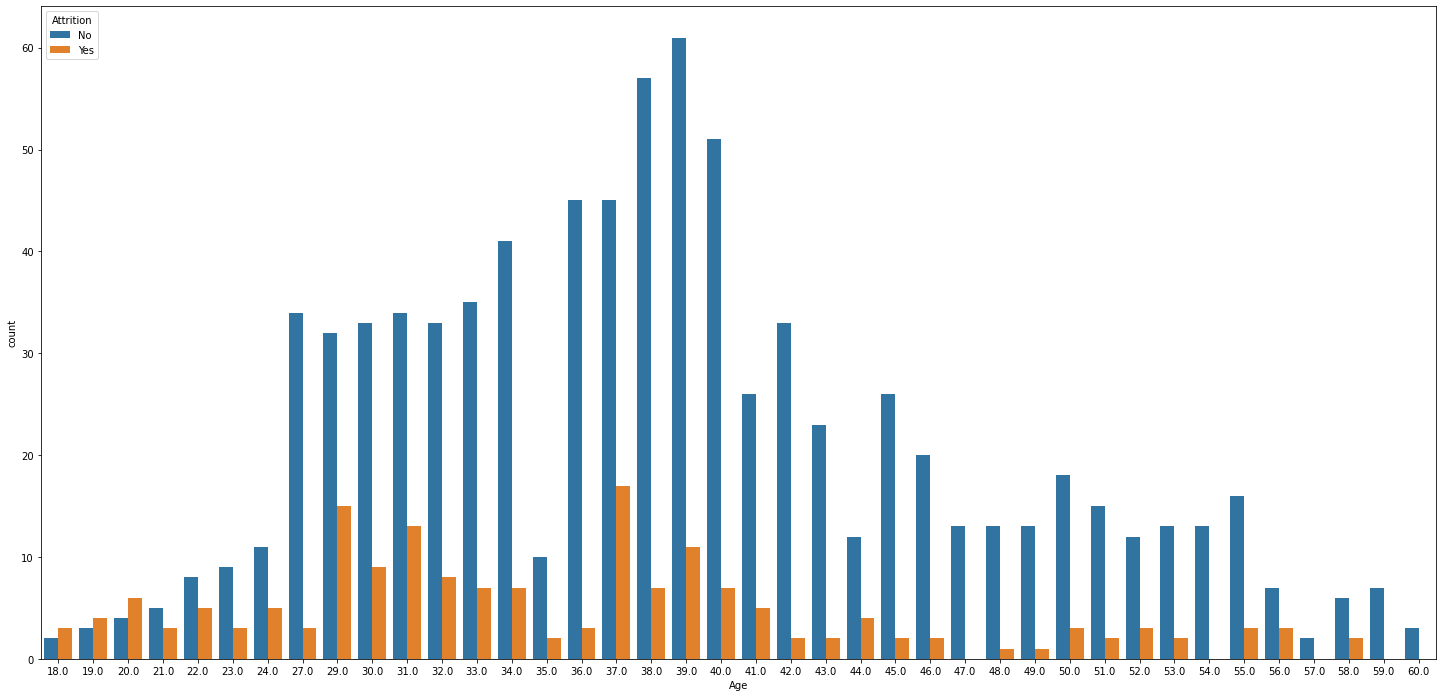

In [46]:
#let us visuallize the attrition rate based on age 
plt.figure(figsize=(25,12))
sns.countplot(x='Age',hue='Attrition',data=df)

People of age 27 to 31 left the company more frequently.Although the number of employee in age 37 to 39 have same amount of attrition but compared to number of employee to there age group 27-31 are more.Also, as age increases the chances of leaving the company decreases.

# let us see of which education category people are leaving the most 



<AxesSubplot:xlabel='EducationField', ylabel='count'>

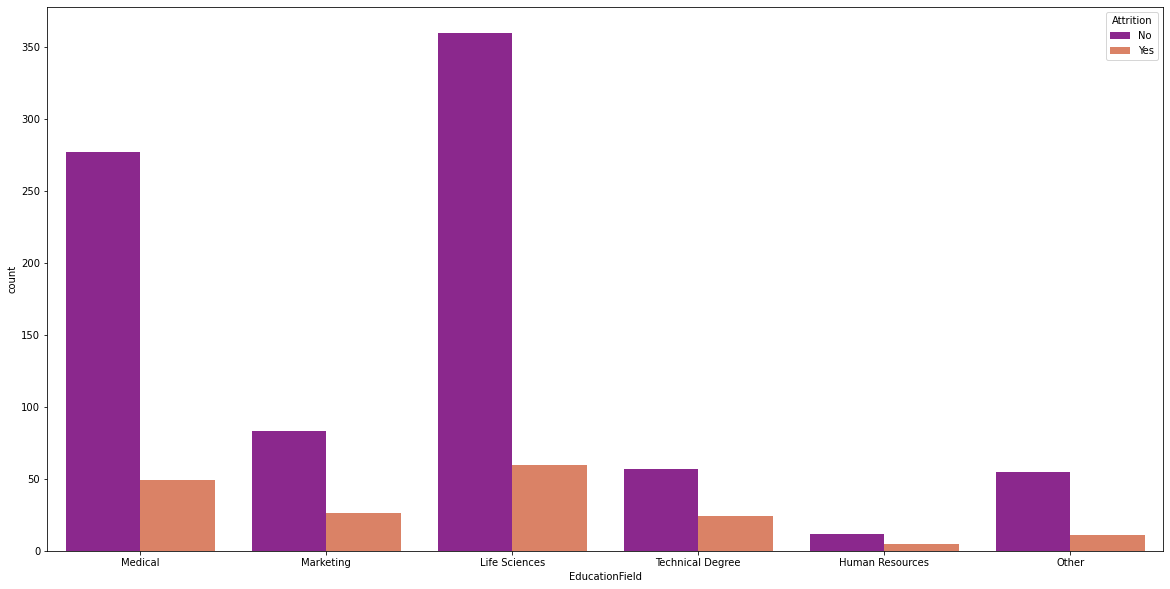

In [47]:
#ploting a count plot 
plt.figure(figsize=(20,10))
sns.countplot(x='EducationField', hue='Attrition', data=df, palette='plasma')

In [48]:
fields_keys = df['EducationField'].value_counts().index
fields_values_edu = df['EducationField'].value_counts().values
fields_values=[]
for i in fields_keys:
    a= df[(df['EducationField']==i) & (df['Attrition']=='Yes')].count()[2]
    fields_values.append(a)

print(fields_keys)
print(fields_values_edu)
print(fields_values)

Index(['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other',
       'Human Resources'],
      dtype='object')
[420 326 109  81  66  17]
[60, 49, 26, 24, 11, 5]


In [49]:
dict_fields=  {fields_keys[i]:fields_values[i] for i in range(len(fields_keys))}
dict_fields
for i in range(6):
    print('Number of people in {} are {}%'.format(fields_keys[i],fields_values[i]))

Number of people in Life Sciences are 60%
Number of people in Medical are 49%
Number of people in Marketing are 26%
Number of people in Technical Degree are 24%
Number of people in Other are 11%
Number of people in Human Resources are 5%


#### Lets calculated the percentage of people resigned per category in Education Field

In [50]:
percentage_education= []
for j in range(len(fields_keys)):
        b = round((fields_values[j]/fields_values_edu[j])*100)
        percentage_education.append(b)
percentage_education

percentage_of_employee_resign_per_cat = {fields_keys[i]:percentage_education[i] for i in range(6)}
percentage_of_employee_resign_per_cat

{'Life Sciences': 14,
 'Medical': 15,
 'Marketing': 24,
 'Technical Degree': 30,
 'Other': 17,
 'Human Resources': 29}

In [51]:
for i in range(6):
    print('Number of people resigned in {} are {}%'.format(fields_keys[i],percentage_education[i]))

Number of people resigned in Life Sciences are 14%
Number of people resigned in Medical are 15%
Number of people resigned in Marketing are 24%
Number of people resigned in Technical Degree are 30%
Number of people resigned in Other are 17%
Number of people resigned in Human Resources are 29%


From the above results we can observe that people in 'Technical Degree' and 'Human Resources' are having higher number of Attrition rate as compared to other.

## Let us see what is the attrtion rate based on the Job role 


<AxesSubplot:xlabel='JobRole', ylabel='count'>

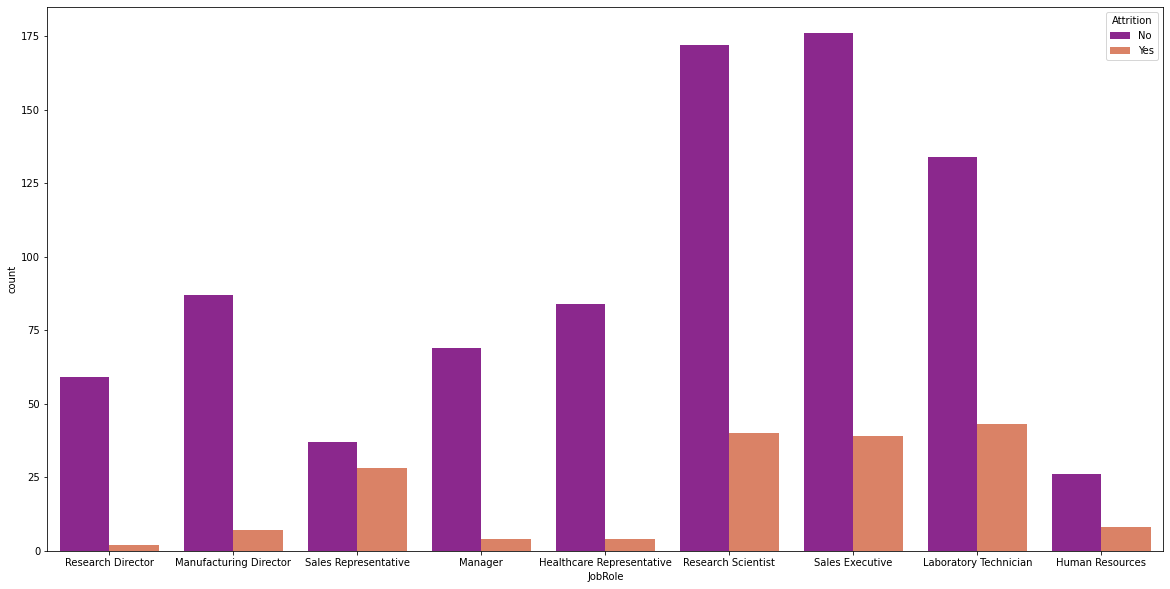

In [52]:
plt.figure(figsize=(20,10))
sns.countplot(x='JobRole', hue='Attrition', data=df, palette='plasma')

In [53]:
job_keys = df['JobRole'].value_counts().index
total_job_values_edu = list(df['JobRole'].value_counts().values)
attrition_job_values=[]
for i in job_keys:
    a= df[(df['JobRole']==i) & (df['Attrition']=='Yes')].count()[2]
    attrition_job_values.append(a)

print(job_keys)
print(total_job_values_edu)
print(attrition_job_values)

Index(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype='object')
[215, 212, 177, 94, 88, 73, 65, 61, 34]
[39, 40, 43, 7, 4, 4, 28, 2, 8]


In [54]:
percentage_job_role= []
for j in range(len(job_keys)):
        b = round((attrition_job_values[j]/total_job_values_edu[j])*100)
        percentage_job_role.append(b)
percentage_job_role


[18, 19, 24, 7, 5, 5, 43, 3, 24]

In [55]:
for i in range(len(job_keys)):
    print('Number of people resigned in {} are {}%'.format(job_keys[i],percentage_job_role[i]))

Number of people resigned in Sales Executive are 18%
Number of people resigned in Research Scientist are 19%
Number of people resigned in Laboratory Technician are 24%
Number of people resigned in Manufacturing Director are 7%
Number of people resigned in Healthcare Representative are 5%
Number of people resigned in Manager are 5%
Number of people resigned in Sales Representative are 43%
Number of people resigned in Research Director are 3%
Number of people resigned in Human Resources are 24%


## As per our understanding the Sales Representative are having  43% of attrition lets find out why?

In [56]:
corrmat=df.loc[df['JobRole']=='Sales Representative'].corr()

In [57]:
job_df= df.loc[(df['JobRole']=='Sales Representative') & (df['Attrition']=='Yes')]

Text(0, 0.5, 'Number of employee Resigned')

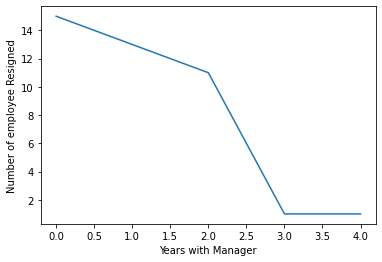

In [58]:
plt.plot(job_df['YearsWithCurrManager'].value_counts())

plt.xlabel('Years with Manager')
plt.ylabel('Number of employee Resigned')

People having less experinced with manger are more lickly to resigned may be this is beacuse of Manager

In [59]:
job_df_no= df.loc[(df['JobRole']=='Sales Representative') & (df['Attrition']=='No')]

### Sales Representitive (Monthly income for attrition category)

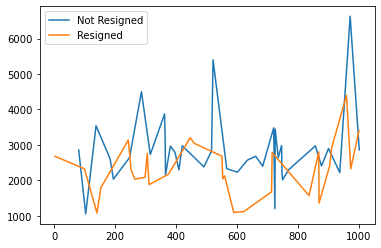

In [60]:
plt.plot(job_df_no['MonthlyIncome'],label='Not Resigned')
plt.plot(job_df['MonthlyIncome'],label='Resigned')
plt.legend()
plt.show()

People who have higher monthly pay in 'Sales Representative' are not likely to resigned as compared to people who have less monthly pay 

##### Years of experience vs Monthly Income

<AxesSubplot:ylabel='MonthlyIncome'>

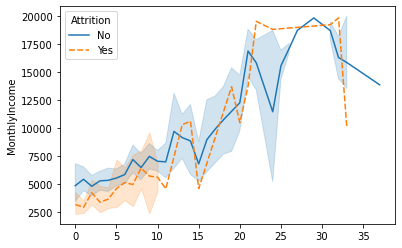

In [61]:
sns.lineplot(x=df['YearsAtCompany'].values,y=df['MonthlyIncome'],hue='Attrition',data=df,legend='auto',style="Attrition")

As we see above people who have Resigned having years at company less then 12 years &  have less salary as compared to people who haven't Resigned this may be one reason for Higher attrition of 'Sales Representive'

## Marital Status vs Attrition

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

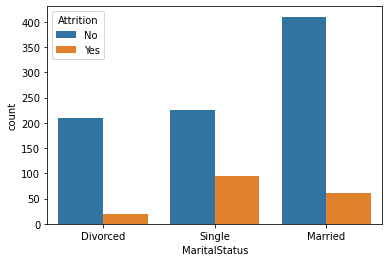

In [62]:
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)

#####  Single men are most licky to leave the job compared to married and divorced

## Job Involvement vs Attrition

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

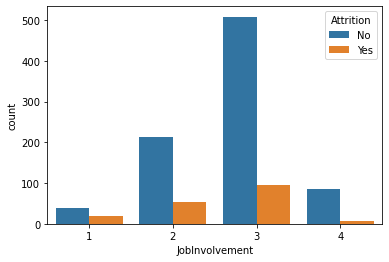

In [63]:
sns.countplot(x='JobInvolvement',hue='Attrition',data=df)

Less involved employees tend to leave the company. If you notice Jobinvolvement = 1, it has more attrition as compared to total population under this category.

### Experienced vs Attrition

In [64]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

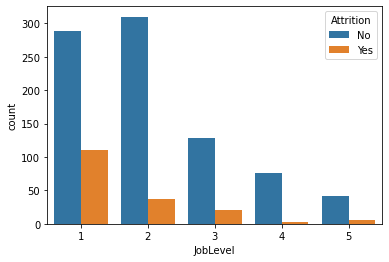

In [65]:
sns.countplot(x='JobLevel',hue='Attrition',data=df)

Less experienced (low job level i.e JobLevel =1) tend to leave the company.

### Distance from Home vs Attrition

Text(0.5, 0, 'Distance From Home')

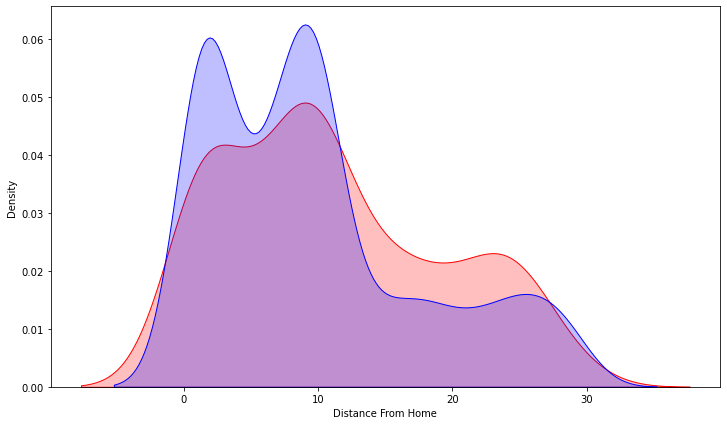

In [66]:
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. 
# KDE describes the probability density at different values in a continuous variable. 

plt.figure(figsize=(12,7))

sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Distance From Home')

People staying far (more than 12km) from office more likely to leave company. You can notice the red line is above blue line after 10 in the x-axis i.e Distance from Home.

###  Total working years 


Text(0.5, 0, 'Total Working Years')

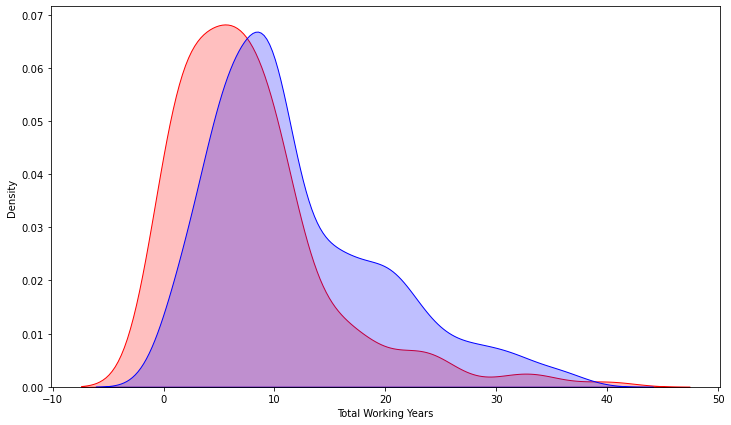

In [67]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['TotalWorkingYears'], shade = True, label= 'Employees who left', color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], shade = True, label= 'Employees who Stayed', color = 'b')

plt.xlabel('Total Working Years')

Employees with less number of years(0 to 6 years) with the company tend to leave the company. You can notice the red line is above blue line at the starting of x-axis i.e Total Working Years. However as you go beyond 6 years, you will find that the blue line tend to supersede which means the employees tend to stay as you increase the total working years.

### Monthly income vs. job role

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

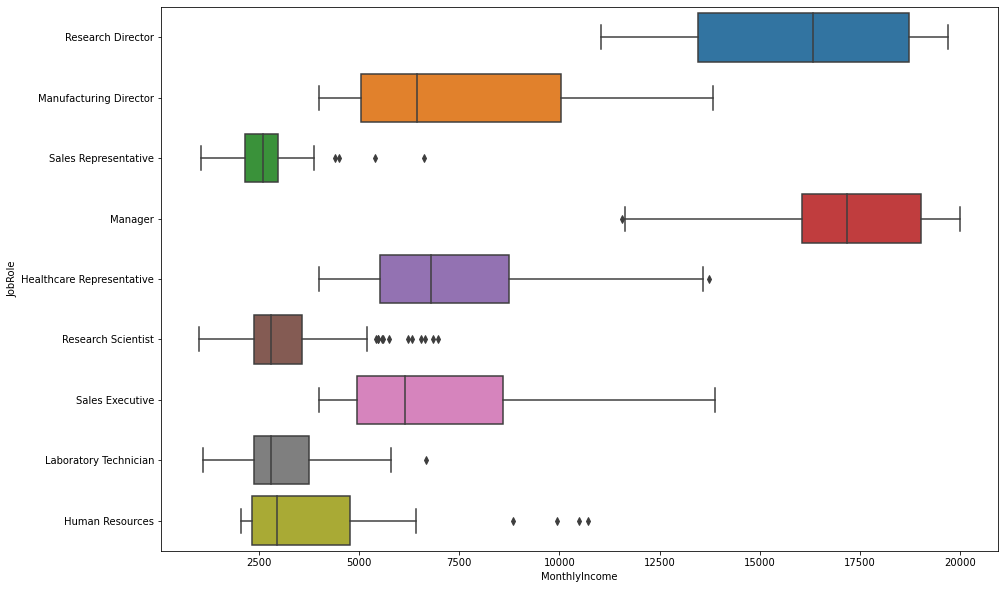

In [68]:
# Let's see the monthly income vs. job role
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = df)

The above box-plot shows that the employees who work as managers tend to get a lot more which obviously makes sense. And it seemed that if you work as Research scientist and Lab technician, the salary range is almost same for both job role.

If you’re doing Sales Representative work, you get paid a lot less compared to the Managers and the Research Directors. The human resources are somewhere in between here as well.

In [69]:
df.to_excel('F:\Board Infinity Projets\Employee Resignation Analysis-20221116T084105Z-001\Employee Resignation Analysis\employee_attrition_clean.xlsx',index=False)

# Building Machine Learning Model to Predict Attrition

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 0 to 1028
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1019 non-null   float64
 1   Attrition                 1019 non-null   object 
 2   BusinessTravel            1019 non-null   object 
 3   DailyRate                 1019 non-null   float64
 4   Department                1019 non-null   object 
 5   DistanceFromHome          1019 non-null   float64
 6   Education                 1019 non-null   int64  
 7   EducationField            1019 non-null   object 
 8   EnvironmentSatisfaction   1019 non-null   int64  
 9   Gender                    1019 non-null   object 
 10  HourlyRate                1019 non-null   int64  
 11  JobInvolvement            1019 non-null   int64  
 12  JobLevel                  1019 non-null   int64  
 13  JobRole                   1019 non-null   object 
 14  JobSatis

In [71]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [72]:
df.shape

(1019, 31)

## Model Bulding 

In [73]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.000000,2,Medical,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,No,22,4,3,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.000000,2,Medical,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,No,20,4,4,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.000000,1,Marketing,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,No,13,3,2,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,9.930407,3,Medical,1,Male,99,3,5,Manager,2,Married,18200,7999,1,No,11,3,3,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.000000,4,Life Sciences,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,No,19,3,4,0,18,4,3,8,6,4,0


In [74]:
df['Attrition']=df.Attrition.map(dict(Yes=1, No=0))

In [75]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    else:
        df[column]=LabelEncoder().fit_transform(df[column])

<ipython-input-75-b2b38dba6098>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-75-b2b38dba6098>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-75-b2b38dba6098>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-75-b2b38dba6098>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-75-b2b38dba6098>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. Th

In [76]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,0,2,1126.0,1,1.000000,1,3,3,1,36,2,3,5,3,0,897,189,9,0,11,1,2,1,32,1,1,5,4,1,3
1,36.0,0,2,216.0,1,6.000000,1,3,1,1,54,2,1,4,1,0,489,27,6,0,9,1,3,2,7,0,2,3,2,0,1
2,21.0,1,2,337.0,2,7.000000,0,2,1,1,1,2,0,8,1,2,187,94,1,0,2,0,1,0,1,3,2,1,0,1,0
3,50.0,0,1,1246.0,0,9.930407,2,3,0,1,69,2,4,3,1,1,910,249,1,0,0,0,2,1,32,2,2,29,5,10,7
4,52.0,0,2,994.0,1,7.000000,3,1,1,1,57,2,2,0,1,2,768,537,7,0,8,0,3,0,18,4,2,8,6,4,0


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=10,max_features=15)

In [78]:
x= df.drop(['Attrition'],axis=1)
y = df['Attrition']

## Univariate Selection

In [99]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [100]:
#apply Select Kbest to extract 10 best features
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(x,y)

In [104]:
dfscore= pd.DataFrame(fit.scores_)
dfcolumns= pd.DataFrame(x.columns)

In [107]:
#concat tow dataframe for better visulaization
featurescores= pd.concat([dfcolumns,dfscore],axis=1)
featurescores.columns=['Specs','Score']#renamingcolumns

In [116]:
featurescores.sort_values(by="Score",ascending=False)

,Specs,Score
15,MonthlyIncome,7849.723642
23,TotalWorkingYears,221.483491
2,DailyRate,213.907964
26,YearsAtCompany,128.163899
27,YearsInCurrentRole,112.276705
29,YearsWithCurrManager,78.237438
0,Age,53.318080
18,OverTime,52.836187
11,JobLevel,39.780497
4,DistanceFromHome,27.753121


In [120]:
print(featurescores.nlargest(15,'Score'))

                      Specs        Score
15            MonthlyIncome  7849.723642
23        TotalWorkingYears   221.483491
2                 DailyRate   213.907964
26           YearsAtCompany   128.163899
27       YearsInCurrentRole   112.276705
29     YearsWithCurrManager    78.237438
0                       Age    53.318080
18                 OverTime    52.836187
11                 JobLevel    39.780497
4          DistanceFromHome    27.753121
22         StockOptionLevel    23.883217
14            MaritalStatus    22.932406
12                  JobRole    13.429167
28  YearsSinceLastPromotion    11.800894
17       NumCompaniesWorked    10.049930


In [122]:
featurescores.nlargest(15,'Score')

,Specs,Score
15,MonthlyIncome,7849.723642
23,TotalWorkingYears,221.483491
2,DailyRate,213.907964
26,YearsAtCompany,128.163899
27,YearsInCurrentRole,112.276705
29,YearsWithCurrManager,78.237438
0,Age,53.318080
18,OverTime,52.836187
11,JobLevel,39.780497
4,DistanceFromHome,27.753121


In [132]:
x= df[['MonthlyIncome','TotalWorkingYears','DailyRate','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager','Age','OverTime','JobLevel','DistanceFromHome','StockOptionLevel','MaritalStatus','JobRole','YearsSinceLastPromotion','NumCompaniesWorked']]
y = df['Attrition']

In [133]:
x.head()

,MonthlyIncome,TotalWorkingYears,DailyRate,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime,JobLevel,DistanceFromHome,StockOptionLevel,MaritalStatus,JobRole,YearsSinceLastPromotion,NumCompaniesWorked
0,897,32,1126.0,5,4,3,50.0,0,3,1.000000,1,0,5,1,9
1,489,7,216.0,3,2,1,36.0,0,1,6.000000,2,0,4,0,6
2,187,1,337.0,1,0,0,21.0,0,0,7.000000,0,2,8,1,1
3,910,32,1246.0,29,5,7,50.0,0,4,9.930407,1,1,3,10,1
4,768,18,994.0,8,6,0,52.0,0,2,7.000000,0,2,0,4,7


In [134]:
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=20,)

In [135]:
x_train.head()

,MonthlyIncome,TotalWorkingYears,DailyRate,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime,JobLevel,DistanceFromHome,StockOptionLevel,MaritalStatus,JobRole,YearsSinceLastPromotion,NumCompaniesWorked
456,658,6,1216.0,5,0,2,33.0,0,1,8.0,0,0,7,1,0
58,782,13,1082.0,9,4,0,54.0,0,2,2.0,1,1,7,7,6
144,156,8,1096.0,7,7,7,39.0,0,0,6.0,1,1,2,7,0
428,363,4,1142.0,2,2,2,40.0,1,0,23.0,1,1,2,2,3
64,574,10,688.0,2,2,2,38.0,0,1,23.0,1,0,0,1,9


In [136]:
len(x_train.columns.value_counts())

15

In [137]:
x_train.shape

(713, 15)

In [138]:
x_train.head()

,MonthlyIncome,TotalWorkingYears,DailyRate,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime,JobLevel,DistanceFromHome,StockOptionLevel,MaritalStatus,JobRole,YearsSinceLastPromotion,NumCompaniesWorked
456,658,6,1216.0,5,0,2,33.0,0,1,8.0,0,0,7,1,0
58,782,13,1082.0,9,4,0,54.0,0,2,2.0,1,1,7,7,6
144,156,8,1096.0,7,7,7,39.0,0,0,6.0,1,1,2,7,0
428,363,4,1142.0,2,2,2,40.0,1,0,23.0,1,1,2,2,3
64,574,10,688.0,2,2,2,38.0,0,1,23.0,1,0,0,1,9


In [139]:
x_train.columns

Index(['MonthlyIncome', 'TotalWorkingYears', 'DailyRate', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager', 'Age', 'OverTime',
       'JobLevel', 'DistanceFromHome', 'StockOptionLevel', 'MaritalStatus',
       'JobRole', 'YearsSinceLastPromotion', 'NumCompaniesWorked'],
      dtype='object')

In [140]:
np.array([x_train]).shape


(1, 713, 15)

In [141]:
np.sort(x_train['Age'].unique())

array([18., 19., 20., 21., 22., 23., 24., 27., 29., 30., 31., 32., 33.,
       34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46.,
       47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59.,
       60.])

In [142]:
for i in x_train.columns:
    print(i)
    print(np.sort(x_train[i].unique()))
     

MonthlyIncome
[  0   1   2   4   5   6   7   8   9  11  12  13  15  17  18  19  20  22
  23  24  25  26  27  28  29  31  32  34  35  36  37  40  41  42  43  44
  45  46  47  48  49  50  51  53  54  55  56  57  59  60  61  62  63  65
  66  67  69  70  71  72  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  92  93  94  95  96  97 100 101 102 103 104 106 109
 110 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 129 130
 131 133 135 137 138 139 141 142 143 146 147 148 149 150 151 152 153 154
 156 158 159 160 161 165 167 169 170 172 174 175 176 177 178 179 180 181
 183 186 187 189 190 191 192 193 194 195 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 214 215 216 218 220 221 223 224 226 228 229
 230 231 232 233 234 235 236 238 240 241 242 244 245 247 248 249 251 253
 254 255 256 257 258 259 260 261 263 264 265 267 268 271 272 273 274 276
 278 280 281 284 285 288 290 291 293 295 296 297 298 301 303 305 306 307
 308 310 313 314 315 316 317 318 319 

In [143]:
model.fit(x_train.values,y_train.values)

RandomForestClassifier(criterion='entropy', max_features=15, n_estimators=10,
                       random_state=10)

In [144]:
model.score(x_train.values,y_train.values)

0.9817671809256662

In [145]:
"""# **Predicting for x_test**"""

'# **Predicting for x_test**'

In [146]:
pred = model.predict(x_test.values)

In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, pred)

0.8627450980392157

In [148]:
confusion_matrix(y_test,pred)

array([[253,   4],
       [ 38,  11]], dtype=int64)

In [149]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       257
           1       0.73      0.22      0.34        49

    accuracy                           0.86       306
   macro avg       0.80      0.60      0.63       306
weighted avg       0.85      0.86      0.83       306



In [150]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle
ERROR: No matching distribution found for pickle


In [151]:
import pickle

In [152]:
with open('model.pkl','wb') as f:
    pickle.dump(rf,f)

NameError: name 'rf' is not defined

In [ ]:
test=[21.0,2,337.0,2,7.000000,0,2,1,1,1,2,0,8,1,2,187,94,1,0,2,0,1,0,1,3,2,1,0,1,0]

In [ ]:
len(test)

In [ ]:
test =np.array([test]).reshape(1,30)

In [ ]:
print(model.predict(test))

In [ ]:
x_test.values[7]

In [ ]:
21.0,2,337.0,2,7.000000,0,2,1,1,1,2,0,8,1,2,187,94,1,0,2,0,1,0,1,3,2,1,0,1,0